In [1]:
from google.colab import files
import zipfile
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

Upload your kaggle.json file for the kaggle API

In [2]:
data_to_load = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Go [here](https://www.kaggle.com/harperd17/mushroom-pictures-sorted) to get your kaggle API command for the line below.

In [4]:
! kaggle datasets download -d harperd17/mushroom-pictures-sorted

 74% 41.0M/55.1M [00:02<00:01, 9.34MB/s]
100% 55.1M/55.1M [00:02<00:00, 19.4MB/s]


In [5]:
zip_ref = zipfile.ZipFile('mushroom-pictures-sorted.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

### Applying Data Augmentation to the training

In [6]:
train_datagen_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.15,
      zoom_range=0.2,
      horizontal_flip=True)

# Visualizing Data Augmentation

In [7]:
pic_path = '/content/files/All_Mushroom_Data_Cleaned/Amanita muscaria/14299.jpg'

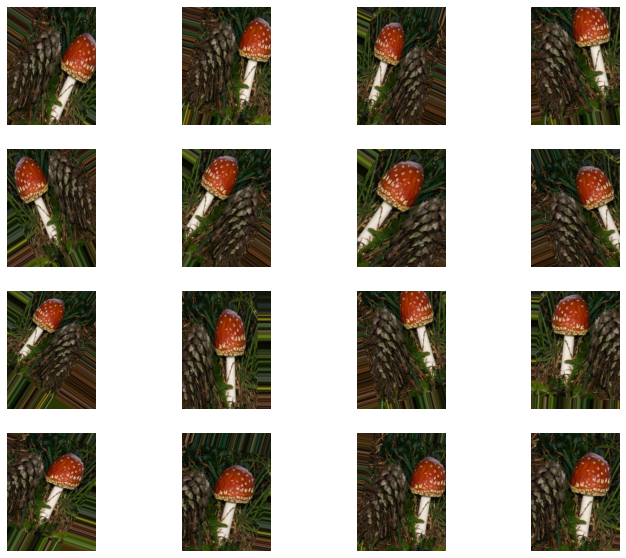

In [8]:
aug_list = []
img = image.img_to_array(image.load_img(pic_path,target_size=(250,187)))
img = img.reshape((1,)+img.shape)

plt.figure(figsize=(12,10))

j = 0
for batch in train_datagen_aug.flow(img,batch_size=1):
  aug_list.append(image.array_to_img(batch[0]))
  j+=1
  if j%16==0:
    break
for i, img in enumerate(aug_list):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(img)
  plt.axis('off')